In [ ]:
import re
import string
import numpy as np 
import pandas as pd
import seaborn as sb
from PIL import Image
from datetime import datetime
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from collections import defaultdict
from nltk import pos_tag,word_tokenize, stem

In [ ]:
dt = pd.read_csv('../input/joe-rogan-experience-1169-elon-musk/joe-rogan-experience-1169-elon-musk.csv')
dt.info()

In [ ]:
dt['Timestamp'] = dt['Timestamp'].apply(lambda x: re.findall('[\d:]+',x)[0])
dt['Timestamp'] = pd.to_datetime(dt['Timestamp'])

In [ ]:
dt.info()

In [ ]:
plt.rcParams["figure.figsize"] = (10,5)
dt['TextLength'] = dt['Text'].apply(lambda x: len(x))
g1 = dt.groupby('Speaker')['TextLength'].sum().apply(lambda x: x/sum(dt['TextLength'])).sort_values().plot.barh()

In [ ]:
plt.rcParams["figure.figsize"] = (20,15)
g1 = dt.groupby(pd.Grouper(key='Timestamp',freq='5Min'))['TextLength'].sum().plot.bar()
xlabels = g1.get_xticklabels()
new_labels = [datetime.strptime(xlabel.get_text(),'%Y-%m-%d %H:%M:%S').time() for xlabel in xlabels]
g1.set_xticklabels(new_labels,rotation=45, fontsize=16)
plt.title('Amount of words said per 5 minutes')
plt.ylabel('Amount of words')
plt.show()

In [ ]:
plt.rcParams["figure.figsize"] = (30,20)
dt1 = dt.groupby([pd.Grouper(key='Timestamp',freq='5Min'),'Speaker'])['TextLength'].mean().reset_index()
dt1['Timestamp'] = dt1['Timestamp'].dt.time
g2 = sb.barplot(x='Timestamp',y='TextLength',hue='Speaker',data=dt1)
g2.set_xticklabels(g2.get_xticklabels(), rotation=40, fontsize=16)
plt.title('Average of words said per Speaker and per 5 minutes')
plt.ylabel('Average of words')
plt.xlabel('TimeStamp',fontsize=16)
plt.show()

In [ ]:
stopWords = stopwords.words('english')
dt_elon = dt.loc[dt['Speaker'] == 'Elon Musk']['Text'].str.lower()
wordcloud = WordCloud(height=700,width=700,margin=0,max_words=1500,stopwords=stopWords,colormap='prism').generate(str(dt_elon.values))
plt.imshow(wordcloud)
plt.title("Elons WordCloud")
plt.show()

In [ ]:
stopWords = stopwords.words('english')
dt_joe = dt.loc[dt['Speaker'] == 'Joe Rogan']['Text'].str.lower()
wordcloud = WordCloud(height=700,width=700,margin=0,max_words=1500,stopwords=stopWords,colormap='prism').generate(str(dt_joe.values))
plt.imshow(wordcloud)
plt.title("Joes WordCloud")
plt.show()

Looks like they have very similar word clouds. With that in mind let's see the most common class of word each one uses. 

Let's use the nltk <code>pos_tag</code> function to classify the word classes. For reference here is the tager.
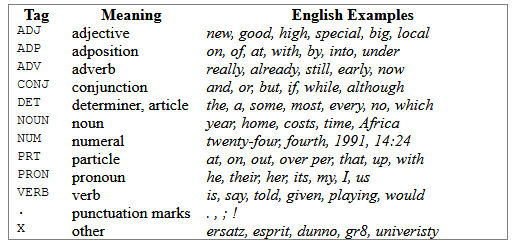

In [ ]:
def classes_dataframe(series,speaker): # simple function for returning classes of words 
    tag_dicts = defaultdict(int)
    for sentence in series.values:
        tokens = word_tokenize(sentence)
        tags = pos_tag(tokens,tagset='universal')
        for tag in tags:
            if tag[1] != '.':
                tag_dicts[tag[1]] += 1
            else:
                pass
    tag_df = pd.DataFrame(tag_dicts.items(),columns=['WordClass','Count'])
    tag_df['Speaker'] = speaker
    return tag_df.sort_values(by='Count',ascending=False)

In [ ]:
elon_wordclass,joe_wordclass = classes_dataframe(dt_elon,'Elon Musk'), classes_dataframe(dt_joe,'Joe Rogan')
wordclass = pd.concat([elon_wordclass,joe_wordclass])

In [ ]:
g3 = sb.barplot(x='WordClass',y='Count',hue='Speaker',data=wordclass)
g3.set_xticklabels(g3.get_xticklabels(), fontsize=18)
plt.title("WordClass per Speaker")
plt.ylabel('WordClass Amount',fontsize=15)
plt.xlabel('WordClass',fontsize=15)
plt.show()

That's all for today folks. If there are any questions do let me know.